In [1]:
import tensorflow as tf
from numpy import unique, argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train =x_train.reshape((x_train.shape[0] ,x_train.shape[1], x_train.shape[2],1))
x_test =x_test.reshape((x_test.shape[0] ,x_test.shape[1], x_test.shape[2],1))

In [4]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

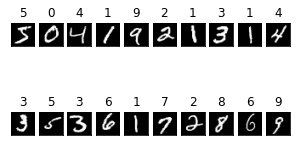

In [5]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
  ax =fig.add_subplot(2,10,i+1 ,xticks=[] ,yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

In [6]:
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

In [7]:
import tensorflow as tf


model = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(10)

])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


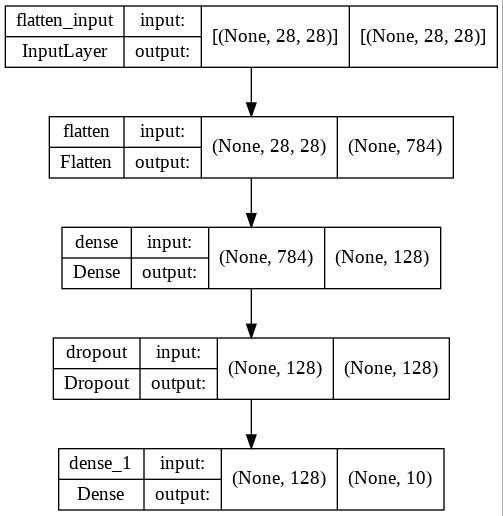

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.jpg', show_shapes=True)


In [10]:
predictions = model(x_train[:1]).numpy()

predictions

array([[-0.19738251, -0.51534927, -0.16129933, -0.10347464, -0.18764876,
        -0.05586323, -0.35133556,  1.0211276 ,  0.2140552 , -0.10108828]],
      dtype=float32)

In [11]:
tf.nn.softmax(predictions).numpy()

array([[0.07767498, 0.05651842, 0.08052893, 0.08532275, 0.07843474,
        0.08948335, 0.06659172, 0.26270807, 0.11721045, 0.08552661]],
      dtype=float32)

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2965 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1423 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1081 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0858 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0737 - accuracy: 0.9764


In [14]:
model.evaluate(x_test,  y_test, verbose=5)

[0.07785062491893768, 0.9768000245094299]

In [15]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.8506033e-08, 4.2852369e-10, 3.0624058e-05, 1.1225793e-03,
        1.3321016e-12, 7.6043534e-07, 5.2392426e-12, 9.9884272e-01,
        7.0738429e-07, 2.6103908e-06],
       [1.0352173e-07, 8.5740157e-06, 9.9995458e-01, 3.6376980e-05,
        2.4117114e-16, 2.2383352e-07, 1.1274157e-09, 3.4706333e-12,
        8.4138499e-08, 5.1264776e-15],
       [1.0815222e-06, 9.9867767e-01, 2.0085457e-04, 2.3250384e-05,
        4.8147849e-05, 3.7762836e-06, 8.1868784e-06, 8.4193907e-04,
        1.9456951e-04, 5.8183554e-07],
       [9.9770182e-01, 2.5456643e-09, 1.1186972e-03, 1.6757333e-06,
        5.9648741e-08, 9.7306456e-06, 1.0824116e-03, 2.1781660e-05,
        4.8474453e-07, 6.3275023e-05],
       [2.9324765e-06, 1.0647671e-10, 5.4800507e-06, 2.8422173e-07,
        9.9779546e-01, 2.3790386e-07, 9.0775205e-07, 1.5997995e-05,
        4.1918984e-06, 2.1744745e-03]], dtype=float32)>

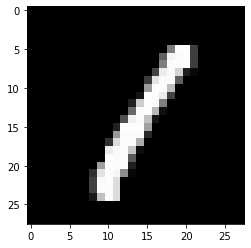

In [16]:
img = x_train[3]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [17]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 1


Thank You!!